Integrantes: Diego Robles, Stefania Puerta, Eduardo Polanco, Yulianny Alvarez

#**Carga**

In [ ]:
#Se importan librerías
import pandas as pd
import numpy as np
import plotly.express as px
from plotly.subplots import make_subplots

In [ ]:
# Leer archivo con extensión csv
# #se muestran las primeras 5 filas del dataset
df = pd.read_csv('diagnostico-cdmx_2015_bienes_dur.csv')
df.head()

In [ ]:
# Se muestran las últimas 5 filas del dataset 
df.tail() 

In [ ]:
# Se visualiza la información general del dataset
df.info()

#**Depuración**

In [ ]:
#renombramos variables para entendimiento
df.rename(columns={'anio':'año','nomgeo':'demarcacion', 'mun':'id_demarcacion'}, inplace= True)

NameError: ignored

In [ ]:
#cambiamos tipos de datos, ya que no usamos decimal para mostrar un año o un id
df['año'].astype('int')
df['id_demarcacion'].astype('int')


In [ ]:
# En la información general se visualiza que no hay datos nulos pero se verifica
df.isnull().sum()

In [ ]:
#verificamos que no haya datos duplicados
df.duplicated()

#**Análisis de Variables**

In [ ]:
# Se analiza la descripción para las variables numéricas
df.describe()

In [ ]:
#análisis de sexo
sexo = df.groupby(["sexo"])[["total"]].count().reset_index()

# crear gráfica
fig = px.bar(sexo, x="sexo", y = "total", title ='<b>Personas según su sexo<b>')

fig.update_layout(
    xaxis_title = 'Sexo',
    template = 'simple_white',
    title_x = 0.5)

fig.show()

En el gráfico de barras podemos observar como la población de mujeres es ligeramente más alta que la de los hombres, sin embargo la diferencia no es significativa.

In [ ]:
#análisis de año
df.groupby(["año"])[["total"]].count()

Vemos que todos los datos solo son del año 2015, lo cual ya se sabia desde que se escogió la base de datos.

In [ ]:
#Análisis por estratos
estratos = df.groupby(["estratos"])[["total"]].count().reset_index()
# crear gráfica
fig = px.bar(estratos, x="estratos", y = "total", title ='<b>Estratos<b>')

fig.update_layout(
    xaxis_title = 'Estrato',
    template = 'simple_white',
    title_x = 0.5)

fig.show()

En el gráfico podemos observar como todas las barras son de tamaño similar,esto nos indica que no hay una variación significativa entre los estratos y que hay una situación de equilibrio o una distribución uniforme de los datos. 

In [ ]:
#Analisis por edad
edad = df.groupby(["edad"])[["total"]].count().reset_index()
# crear gráfica
fig = px.bar(edad, x="edad", y = "total", title ='<b>Edades<b>')

fig.update_layout(
    xaxis_title = 'Rango de edades',
    template = 'simple_white',
    title_x = 0.5)

fig.show()

E el ráfico de barras vemos como todos los rango de edades tienen exactamente la misma cantidad, la cual es 160 personas, a esepción de la categoria no especificado que cuenta con 92 personas.

In [ ]:
#análisis por zonas
demarcacion = df.groupby(["demarcacion"])[["total"]].count().reset_index()
# crear gráfica
fig = px.bar(demarcacion, x="demarcacion", y = "total", title ='<b>Demarcación territorial<b>')

fig.update_layout(
    xaxis_title = 'Zonas',
    template = 'simple_white',
    title_x = 0.5)

fig.show()

Al igual que en los demas gráficos de barras, la variable de demaracción también presenta los mismos valores para las diferentes zonas, siendo la zona de Iztapalapa, la zona de mayor número de encuentados con 60 personas, y la de Venustiano Carranza la de menor número con 50 personas.

In [ ]:
# se hace análisis de los valores unicos y se muestran en las siguientes 5 lineas
id_demarcacion_unicos = df.id_demarcacion.unique()
estratos_unicos = df.estratos.unique()
sexo_unicos = df.sexo.unique()
edad_unicos = df.edad.unique()
demarcacion_unicos = df.demarcacion.unique()

In [ ]:
id_demarcacion_unicos

array([ 2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14.,
       15., 16., 17.])

In [ ]:
estratos_unicos

array(['Pobreza muy alta', 'Pobreza alta', 'Pobreza moderada',
       'Satisfaccion mínima', 'Estrato alto'], dtype=object)

In [ ]:
sexo_unicos

array(['Hombre', 'Mujer'], dtype=object)

In [ ]:
edad_unicos

array(['12-29', '60 y mas', '30-44', '0-11', 'No especificado', '45-59'],
      dtype=object)

In [ ]:
demarcacion_unicos

array(['Azcapotzalco', 'Coyoacán', 'Cuajimalpa de Morelos',
       'Gustavo A. Madero', 'Iztacalco', 'Iztapalapa',
       'La Magdalena Contreras', 'Milpa Alta', 'Álvaro Obregón',
       'Tláhuac', 'Tlalpan', 'Xochimilco', 'Benito Juárez', 'Cuauhtémoc',
       'Miguel Hidalgo', 'Venustiano Carranza'], dtype=object)

#**Preguntas**

In [ ]:
#PREGUNTA: ¿Qué regiones presentan la mayor cantidad de individuos en el estrato social calificado como “Pobreza alta”
#hacemos analisis de de pobreza por demarcacion, concluímos que en los que más pobreza se ve son en iztapalapa y la magdalena contreras
df_pobreza_alta = df[df['estratos'] == 'Pobreza alta']
conteo_estratos = df_pobreza_alta.groupby('demarcacion').size().reset_index(name='conteo')

# Ordenar los valores de forma ascendente
conteo_estratos = conteo_estratos.sort_values(by='conteo', ascending=True)

fig = px.bar(conteo_estratos, x='demarcacion', y='conteo', color='demarcacion')
fig.update_layout(title='Conteo de "Pobreza alta" por Demarcación')
fig.show()

In [ ]:
#PREGUNTA: ¿cuales son los espacios territoriales que cuentan con el menor numero de personas en estrato social alto?
#hacemos un conteo de estrato alto por demarcacion y encontramos que tienden a tener la misma cantidad, las demarcaciones ventusiano carranza y tláhuac tienen menos cantidad de personas con alto estrato
df_estrato_alto = df[df['estratos'] == 'Estrato alto']
conteo_estratos = df_estrato_alto.groupby('demarcacion').size().reset_index(name='conteo')

# Ordenar los valores de forma ascendente
conteo_estratos = conteo_estratos.sort_values(by='conteo', ascending=True)

fig = px.bar(conteo_estratos, x='demarcacion', y='conteo', color='demarcacion')
fig.update_layout(title='Conteo de "Estrato alto" por Demarcación')
fig.show()

In [ ]:
#PREGUNTA: ¿Segun la información recolectada, cual de los generos esta mas presente en el estrato social "Pobreza Alta"
#al graficar por sexo las personas de pobreza alta nos encontramos que hay bastantes igualdad en cantidad de recursos
df_pobreza_alta = df[df['estratos'] == 'Pobreza alta']

conteo_estratos_sexo = df_pobreza_alta.groupby('sexo').size().reset_index(name='conteo')

fig = px.pie(conteo_estratos_sexo, values='conteo', names='sexo')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(title='Conteo de "Pobreza alta" por Sexo')
fig.show()

In [ ]:
#PREGUNTA: ¿Segun la información recolectada, cual de los generos esta mas presente en el estrato social "Estrato Alto"
# igualmente se nota bastante que no hay varianza si hacemos el filtro por estrato alto
df_estrato_alto = df[df['estratos'] == 'Estrato alto']

conteo_estratos_sexo = df_estrato_alto.groupby('sexo').size().reset_index(name='conteo')

fig = px.pie(conteo_estratos_sexo, values='conteo', names='sexo')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(title='Conteo de "estrato alto" por Sexo')
fig.show()

In [ ]:
#¿Cual es la media de bienes durables para cada estrato?
# en este grafico top, podemos ver la media del total de bienes durables con la que cuenta cada estrato siendo el que lidera el Estrato alto, esto claro puede verse sustentado por una mayor facilidad para la adquisición de estos bienes
conteo_estratos_total = df.groupby('estratos')['total'].agg(count='count', mean='mean').reset_index().sort_values('mean',ascending= False)
fig = px.funnel(conteo_estratos_total, x='mean', y='estratos', color='count')
fig.update_layout(title='Gráfico Funnel de Estratos', xaxis_title='Conteo', yaxis_title='Estrato')
fig.show()


In [ ]:
#¿Que genero cuenta con la mayor acumulación de bienes durables?
# en la cantidad del total de bienes durables, podemos ver que se dispersa minimamente hacia el sexo de las mujeres la cantidad
conteo_sexo_total = df.groupby('sexo')['total'].agg(count='count', mean='mean').reset_index().sort_values('mean',ascending= False)
fig = px.funnel(conteo_sexo_total, x='mean', y='sexo', color='count')
fig.update_layout(title='Gráfico Funnel de Estratos', xaxis_title='Conteo', yaxis_title='sexo')
fig.show()


In [ ]:
#Cual es la variación de la pobreza alta segun la demarcación y la zona?
# el data set no cuenta con una gran varianza en la cantidad de encuestados por demarcación y zona por lo tanto se evidencia una falta de aleatoriedad en la recolección de los datos
df_pobreza_alta = df[df['edad'] == '60 y mas']
conteo_estratos = df_pobreza_alta.groupby('estratos').size().reset_index(name='conteo')
fig = px.bar(conteo_estratos, x='estratos', y='conteo', color='estratos')
fig.update_layout(title='Conteo de "Pobreza alta" por Demarcación')
fig.show()

In [ ]:
#Segunda base de datos-Necesidades basicas insatisfechas
df = pd.read_csv('gnbi2020 (1).csv')
df.head()


,id_viv,id_persona,sexo,edad,parentesco,hlengua,elengua,asisten,alfabet,situa_conyugal,...,E_CSj,E_CENJ,E_CTELJ,E_IVj,E_CBDj,E_rei,E_CASSI,E_CASI,E_nbi,E_ett
0,90020000001,9.002000e+15,3,72,101,3.0,7.0,3.0,1.0,7.0,...,4.0,4.0,6.0,4.0,5.0,3.0,4.0,4.0,3.0,1.0
1,90020000001,9.002000e+15,1,77,201,3.0,7.0,3.0,1.0,7.0,...,4.0,4.0,6.0,4.0,5.0,4.0,4.0,4.0,3.0,1.0
2,90020000001,9.002000e+15,3,47,301,3.0,7.0,3.0,1.0,5.0,...,4.0,4.0,6.0,4.0,5.0,5.0,4.0,4.0,3.0,1.0
3,90020000001,9.002000e+15,3,40,301,3.0,7.0,3.0,1.0,1.0,...,4.0,4.0,6.0,4.0,5.0,5.0,1.0,2.0,3.0,1.0
4,90020000001,9.002000e+15,1,45,418,3.0,7.0,3.0,1.0,5.0,...,4.0,4.0,6.0,4.0,5.0,5.0,4.0,4.0,3.0,1.0


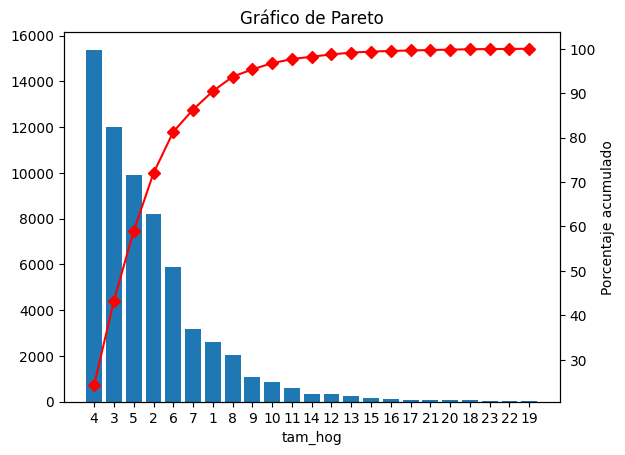

In [ ]:
import matplotlib.pyplot as plt
# Calcular la frecuencia de cada valor en la columna 'tam_hog'
frequency = df['tam_hog'].value_counts()

# Ordenar los valores en orden descendente
sorted_frequency = frequency.sort_values(ascending=False)

# Calcular el porcentaje acumulado
cumulative_percentage = sorted_frequency.cumsum()/sorted_frequency.sum()*100

# Crear un gráfico de barras para la frecuencia ordenada
fig, ax = plt.subplots()
ax.bar(range(len(sorted_frequency)), sorted_frequency.values)
ax.set_xticks(range(len(sorted_frequency)))
ax.set_xticklabels(sorted_frequency.index)

# Crear un gráfico de líneas para el porcentaje acumulado
ax2 = ax.twinx()
ax2.plot(range(len(cumulative_percentage)), cumulative_percentage.values, color='red', marker='D')

# Establecer la etiqueta del eje y para el gráfico de líneas
ax2.set_ylabel('Porcentaje acumulado')

# Establecer la etiqueta del eje x
ax.set_xlabel('tam_hog')

# Establecer el título
ax.set_title('Gráfico de Pareto')

plt.show()



Analizando el grafico de pareto obtenido al aplicarlo a la variable tamaño de hogar, observamos que los hogares con 4,3,5,2 y 6 habitantes, correspondiente a el 20% de los hogares con tamaños forman el 80% de los datos obtenidos, lo que sugiere que debemos centrarnos en analizar los hogares conformados por esos numeros de habitantes.

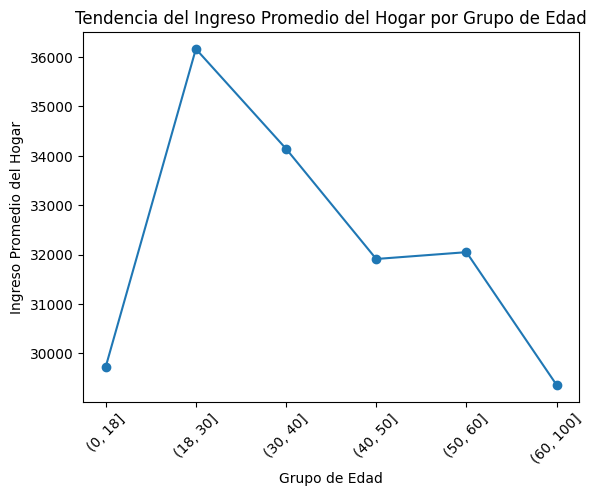

In [ ]:
#¿cual es el grupo poblacional por edad que genera el mayor ingreso promedio para su hogar?

#S/Se evidencia que en el grupo poblacional de 18 a 30 años hay un notorio aumento en el valor de ingreso generado para el hogar, se podria hacer la suposición que al tratarse de un rango poblacional
#tan joven, la razon de que se encuentren en la cima es por su misma juventud que es un caracter de interes para las empresas de hoy en día. 

# Agrupa los datos por grupos de edad y calcula el ingreso promedio del hogar
age_groups = pd.cut(df['edad'], bins=[0, 18, 30, 40, 50, 60, 100])
avg_income_by_age = df.groupby(age_groups)['ingtrhog'].mean()

# Crea el gráfico de línea
avg_income_by_age.plot(kind='line', marker='o')
plt.xlabel('Grupo de Edad')
plt.ylabel('Ingreso Promedio del Hogar')
plt.title('Tendencia del Ingreso Promedio del Hogar por Grupo de Edad')
plt.xticks(rotation=45)
plt.show()

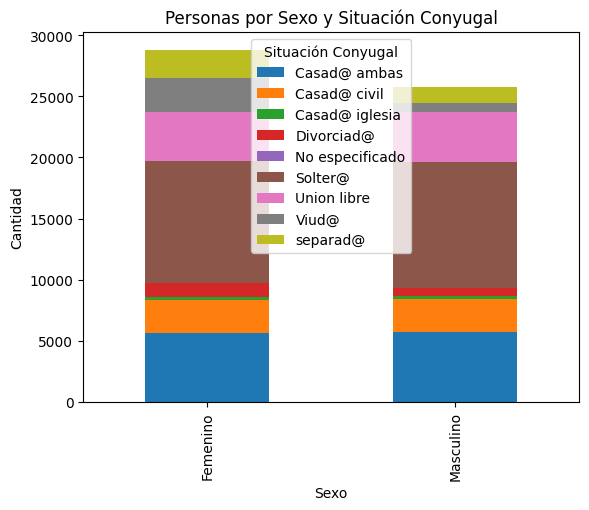

In [ ]:
import seaborn as sns

cross_table = pd.crosstab(df['sexo'], df['situa_conyugal'])
df['sexo'] = df['sexo'].replace({1: 'Masculino', 3: 'Femenino'})
df['situa_conyugal']= df['situa_conyugal'].replace({1.0:'Union libre', 2.0:'separad@',3.0:'Divorciad@',4.0:'Viud@',5.0:'Casad@ civil',6.0:'Casad@ iglesia',7.0:'Casad@ ambas',8.0:'Solter@',9.0:'No especificado'})
cross_table.plot(kind='bar', stacked=True)
plt.xlabel('Sexo')
plt.ylabel('Cantidad')
plt.title('Personas por Sexo y Situación Conyugal')
plt.legend(title='Situación Conyugal',loc='upper center')
plt.show()